In [1]:
%matplotlib notebook
import os
from skimage.color import rgb2gray
from skimage.io import imread, imsave
from skimage.morphology import thin, skeletonize
from skimage.draw import circle
from skimage.filters import gaussian
from scipy.misc import imsave

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

def create_filter(fft, R0, theta, radius_of_filter, blur):
    y_size, x_size=fft.shape
    X=round(R0*np.sin(theta*np.pi/180))
    Y=round(R0*np.cos(theta*np.pi/180))
    x1=round(x_size/2)-X
    x2=round(x_size/2)+X
    y1=round(y_size/2)+Y
    y2=round(y_size/2)-Y

    fft_filter=np.zeros_like(np.abs(fftim))

    # two circle filter
    rr, cc = circle(r=y1, c=x1, radius=radius_of_filter, shape=fft_filter.shape)
    fft_filter[rr, cc] = 1
    rr, cc = circle(r=y2, c=x2, radius=radius_of_filter, shape=fft_filter.shape)
    fft_filter[rr, cc] = 1
    
    fft_filter=gaussian(fft_filter, blur)

    return (x1,x2,y1,y2), fft_filter

def plot_filter(fft, R0, theta, radius_of_filter, blur):
    (x1,x2,y1,y2), fft_filter=create_filter(fft, R0, theta, radius_of_filter, blur)
    
    x_l=min(x1,x2)-radius_of_filter
    x_u=max(x1,x2)+radius_of_filter
    y_l=min(y2,y1)-radius_of_filter
    y_u=max(y1,y2)+radius_of_filter
    
    masked_fft=fft_filter*fftim
   
    fig, ax=plt.subplots(figsize=(8,8))
    ax.imshow(np.abs(masked_fft[y_l:y_u,x_l:x_u]))



def plot_threshold(im, threshold):
    bwimage=im>threshold
    imthin=thin(bwimage)

    fig, ax=plt.subplots(figsize=(12,8))
    ax.imshow(imthin, cmap='gray')
    
x_fringe_width=widgets.IntSlider(min=-200,
                                 max=200,
                                 step=5,
                                 value=100,
                                 description='Fringe width in x:', 
                                 continuous_update=False)

y_fringe_width=widgets.IntSlider(min=-200,
                                 max=200,
                                 step=5,
                                 value=100,
                                 description='Fringe width in y:', 
                                 continuous_update=False)

R0=widgets.IntSlider(min=0,
                                 max=200,
                                 step=5,
                                 value=100,
                                 description='R_0:', 
                                 continuous_update=False)

theta=widgets.IntSlider(min=0,
                                 max=180,
                                 step=5,
                                 value=100,
                                 description='Theta:', 
                                 continuous_update=False)


radius_of_filter=widgets.IntSlider(min=0,
                                   max=200,
                                   step=5,
                                   value=40,
                                   description='Radius of filter:', 
                                   continuous_update=False)

blur=widgets.IntSlider(min=0,
                       max=50,
                       step=1,
                       value=10,
                       description='Filter blur:', 
                       continuous_update=False)

threshold=widgets.FloatSlider(min=0,
                              max=0.1,
                              step=0.0001,
                              value=0.03,
                              description='Binary threshold:',
                              continuous_update=False,
                              readout=True,
                              readout_format='.3f',
                             )

In [2]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0616_15 RECONNECTION C No TS"
interferogram_path="s0616_15 IR side on interferometry t260ns.JPG"

interferogram=imread(interferogram_path)
interferogram=rgb2gray(interferogram)#to convert the image into a logical array.
blurred_interferogram=gaussian(interferogram, 30)
normalised_interferogram=interferogram/blurred_interferogram
fftim=(np.fft.fftshift(np.fft.fft2(normalised_interferogram)))

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0616_15 RECONNECTION C No TS


<IPython.core.display.Javascript object>


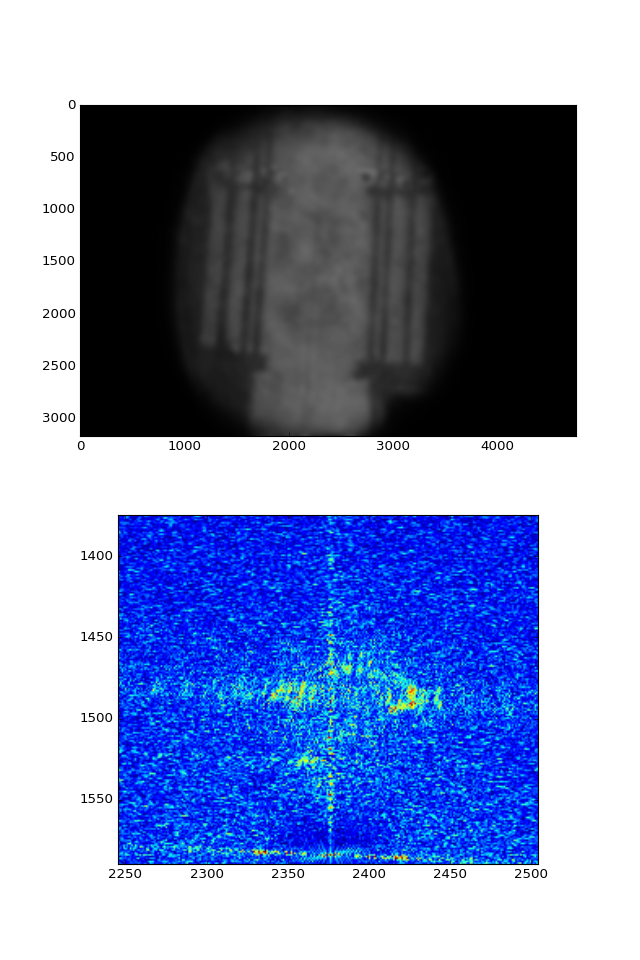

In [3]:
fig, ax=plt.subplots(2,1, figsize=(8,12))
ax[0].imshow(blurred_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(np.abs(fftim), clim=[0,100000])

<IPython.core.display.Javascript object>


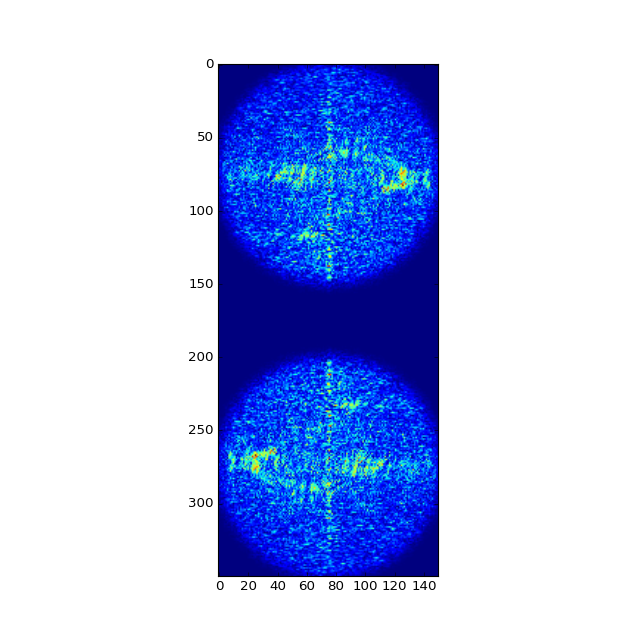

C:\Users\jdhare\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [4]:
'''w1=interactive(plot_filter, 
               fft=fixed(fftim), xfwidth=x_fringe_width, yfwidth=y_fringe_width, 
               radius_of_filter=radius_of_filter, blur=blur)'''
w1=interactive(plot_filter, 
               fft=fixed(fftim), R0=R0, theta=theta, 
               radius_of_filter=radius_of_filter, blur=blur)
display(w1)

#50, -50

In [7]:
a,fft_filter=create_filter(**w1.kwargs)
masked_fft=fft_filter*fftim
ifftim=abs((np.fft.ifft2(masked_fft)))

#w2=interactive(plot_threshold, im=fixed(ifftim), threshold=threshold)
#display(w2)

<IPython.core.display.Javascript object>


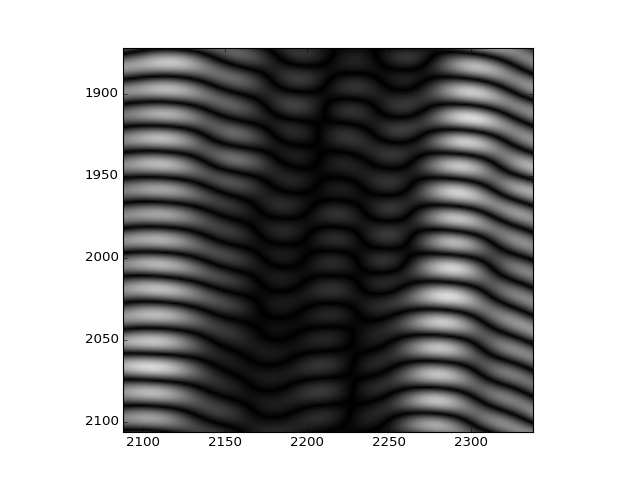

In [8]:
fig, ax=plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True)
ax.imshow(ifftim, cmap='gray', clim=[0,1])

In [10]:
bwimage=ifftim>0.13#w2.kwargs['threshold']
imthin=thin(bwimage, max_iter=1000)
invert=1-imthin
save_fn=os.path.splitext(interferogram_path)[0]+' traced.png'
imsave(save_fn, invert*255)

# Annular filter

<IPython.core.display.Javascript object>


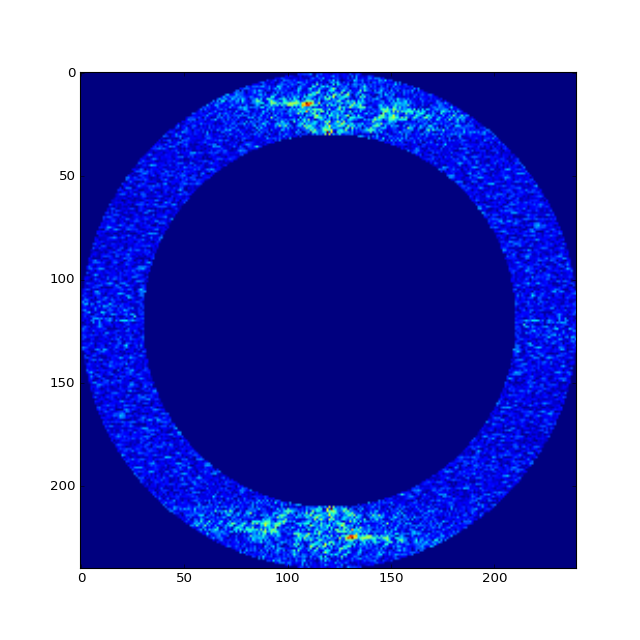

In [15]:
fft_filter=np.zeros_like(np.abs(fftim))
ysize,xsize=fft_filter.shape
r0=ysize//2
c0=xsize//2

r1=90
r2=120

# annular
rr, cc = circle(r=r0, c=c0, radius=r2, shape=fft_filter.shape)
fft_filter[rr, cc] = 1
rr, cc = circle(r=r0, c=c0, radius=r1, shape=fft_filter.shape)
fft_filter[rr, cc] = 0

masked_fft=fft_filter*fftim

x_l=c0-r2
x_u=c0+r2
y_l=r0-r2
y_u=r0+r2

fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(np.abs(masked_fft[y_l:y_u,x_l:x_u]))

In [19]:
ifftim=abs((np.fft.ifft2(masked_fft)))
threshold=0.3
bwimage=interferogram>threshold

In [20]:
tt=thin(bwimage, max_iter=1000)

<IPython.core.display.Javascript object>


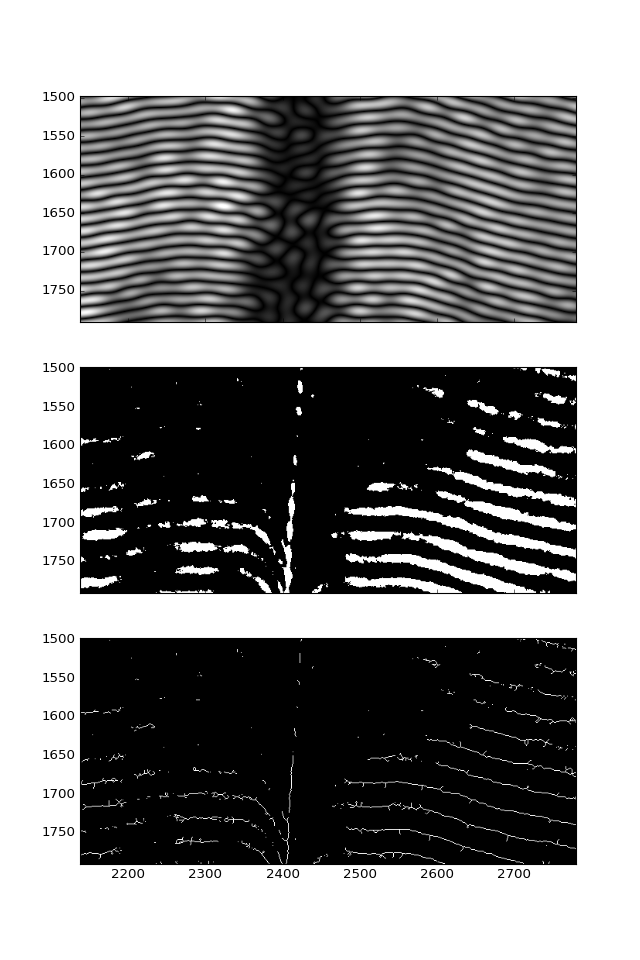

In [21]:
fig, ax=plt.subplots(3,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(ifftim, cmap='gray', clim=[0,1])
ax[1].imshow(bwimage, cmap='gray', clim=[0,1])
ax[2].imshow(tt, cmap='gray', clim=[0,1])

# No Filter (just normalisation)

In [57]:
interferogram=rgb2gray(interferogram)#to convert the image into a logical array.
blurred_interferogram=gaussian(interferogram, 40)
normalised_interferogram=interferogram/blurred_interferogram

<IPython.core.display.Javascript object>


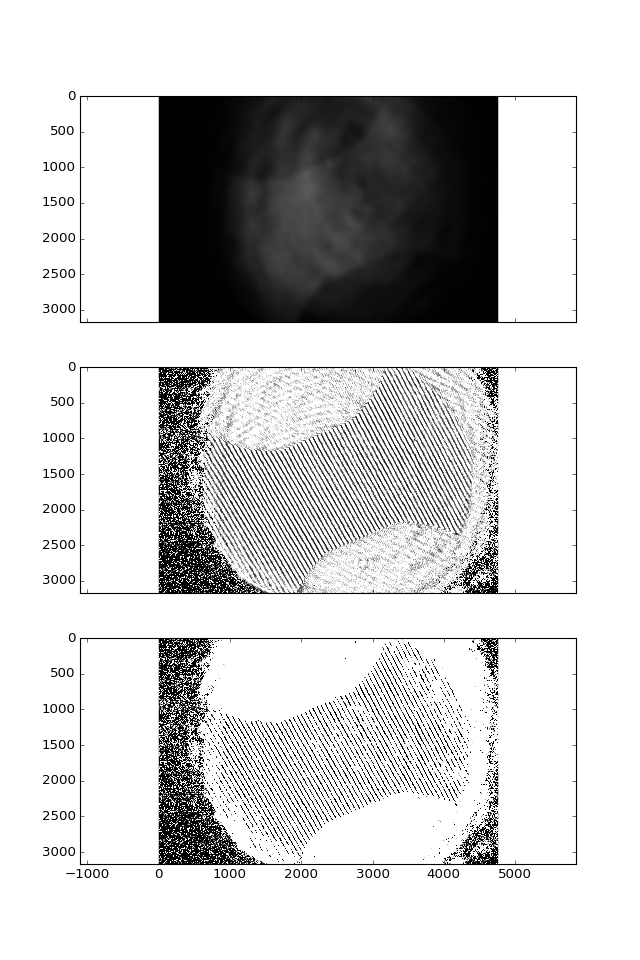

In [62]:
threshold=0.3
bwimage=normalised_interferogram>threshold

fig, ax=plt.subplots(3,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(blurred_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[2].imshow(bwimage, cmap='gray', clim=[0,1])

In [63]:
tt=thin(bwimage, max_iter=1000)

<IPython.core.display.Javascript object>


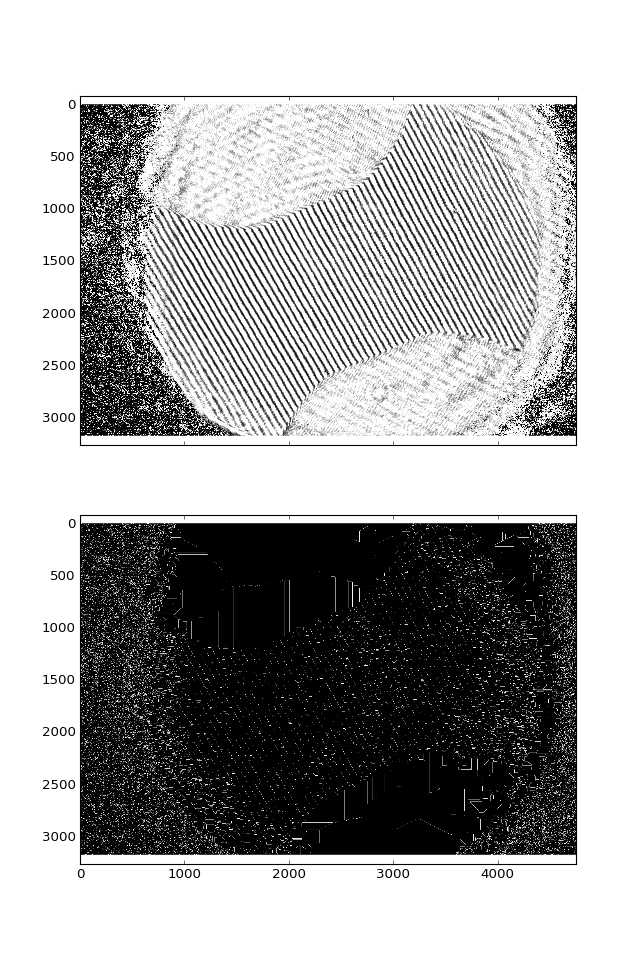

In [64]:
fig, ax=plt.subplots(2,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(tt, cmap='gray', clim=[0,1])